In [1]:
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
# Defining 2D DCT and IDCT functions

In [3]:
def DCT_2d(img):
    
    img = np.asarray(img)
    img_size = img.shape
    dct = np.zeros(img.shape)
    
    for k in range(img_size[0]):
        for l in range(img_size[1]):
            alpha_k = np.sqrt(1/img_size[0]) if k == 0 else np.sqrt(2/img_size[0])
            alpha_l = np.sqrt(1/img_size[1]) if l == 0 else np.sqrt(2/img_size[1])
            
            sum = 0
            for m in range(img_size[0]):
                for n in range(img_size[1]):
                    sum += img[m][n] * np.cos((2*m+1)*k*np.pi/(2*img_size[0])) * np.cos((2*n+1)*l*np.pi/(2*img_size[1]))
            dct[k,l] = alpha_k * alpha_l * sum
    return dct

In [4]:
def IDCT_2d(img):

    img = np.asarray(img)
    img_size = img.shape
    idct = np.zeros(img_size)
    
    for m in range(img_size[0]):
        for n in range(img_size[1]):
            for k in range(img_size[0]):
                for l in range(img_size[1]):
                    alpha_k = np.sqrt(1/img_size[0]) if k == 0 else np.sqrt(2/img_size[0])
                    alpha_l = np.sqrt(1/img_size[1]) if l == 0 else np.sqrt(2/img_size[1])
                    idct[m,n] += alpha_k * alpha_l * img[k][l] * np.cos((2*m+1)*k*np.pi/(2*img_size[0])) * np.cos((2*n+1)*l*np.pi/(2*img_size[1]))
    return idct

In [5]:
# Energy calculation of a matrix

In [6]:
def energy_mat(img):

    e = 0
    img = np.reshape(img, -1)
    for i in img:
        e += pow(abs(i), 2)
    return e

##### Part (a)

In [7]:
a = np.array([[90, 100], [100, 175]])

print('Input Matrix:\n', a)
print('\nEnergy of input matrix:', energy_mat(a))
print()

tic1 = time.time()
dct1 = DCT_2d(a)
toc1 = time.time()

print('\nNon Library DCT:\n', dct1)
print('\nProcessing time non library method: {:f}'.format(toc1 - tic1))
print('Energy of DCT of matrix using Non library method:', energy_mat(dct1))


from scipy.fftpack import dct

tic2 = time.time()
dct2 = dct(dct(a.T, norm='ortho').T, norm='ortho')
toc2 = time.time()

print('\nScipy library DCT:\n', dct2)

print('\nProcessing time for Scipy method: {:f}'.format(toc2 - tic2))

print('Energy of DCT of matrix using scipy:', energy_mat(dct2))


Input Matrix:
 [[ 90 100]
 [100 175]]

Energy of input matrix: 58725


Non Library DCT:
 [[232.5 -42.5]
 [-42.5  32.5]]

Processing time non library method: 0.000157
Energy of DCT of matrix using Non library method: 58725.00000000003

Scipy library DCT:
 [[232.5 -42.5]
 [-42.5  32.5]]

Processing time for Scipy method: 0.000703
Energy of DCT of matrix using scipy: 58725.00000000003


In [8]:
tic3 = time.time()
idct1 = IDCT_2d(dct1)
toc3 = time.time()
print('Non library method of IDCT:\n', idct1)
print('\nProcessing time for Non library method: {:f}'.format(toc3 - tic3))

from scipy.fftpack import idct
tic4 = time.time()
idct2 = idct(idct(dct2.T, norm='ortho').T, norm='ortho')
toc4 = time.time()
print('\nScipy library IDCT:\n', idct2)
print('Processing time for Scipy method: {:f}'.format(toc4 - tic4))

Non library method of IDCT:
 [[ 90. 100.]
 [100. 175.]]

Processing time for Non library method: 0.000122

Scipy library IDCT:
 [[ 90. 100.]
 [100. 175.]]
Processing time for Scipy method: 0.000573


##### Part (b)

In [9]:
b = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90], [100, 110, 120], [130, 140, 150]])

print('Input Matrix:\n', b)
print('\nEnergy of input matrix:', energy_mat(b))
print()

tic1 = time.time()
dct1 = DCT_2d(b)
toc1 = time.time()

print('\nNon Library DCT:\n', dct1)
print('\nProcessing time non library method: {:f}'.format(toc1 - tic1))
print('Energy of DCT of matrix using Non library method:', energy_mat(dct1))


from scipy.fftpack import dct

tic2 = time.time()
dct2 = dct(dct(b.T, norm='ortho').T, norm='ortho')
toc2 = time.time()

print('\nScipy library DCT:\n', dct2)

print('\nProcessing time for Scipy method: {:f}'.format(toc2 - tic2))

print('Energy of DCT of matrix using scipy:', energy_mat(dct2))

Input Matrix:
 [[ 10  20  30]
 [ 40  50  60]
 [ 70  80  90]
 [100 110 120]
 [130 140 150]]

Energy of input matrix: 124000


Non Library DCT:
 [[ 3.09838668e+02 -3.16227766e+01  3.11344228e-14]
 [-1.63652815e+02 -1.46769076e-14 -1.46769076e-14]
 [-1.55672114e-14  0.00000000e+00  0.00000000e+00]
 [-1.47565651e+01  0.00000000e+00  0.00000000e+00]
 [-5.44852398e-14 -7.33845382e-15 -5.50384036e-15]]

Processing time non library method: 0.002054
Energy of DCT of matrix using Non library method: 123999.99999999994

Scipy library DCT:
 [[ 3.09838668e+02 -3.16227766e+01 -1.77635684e-15]
 [-1.63652815e+02 -2.00971835e-14  1.16031143e-14]
 [-5.12790050e-16  5.02429587e-15  2.90077857e-15]
 [-1.47565651e+01  5.02429587e-15  2.90077857e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

Processing time for Scipy method: 0.000173
Energy of DCT of matrix using scipy: 124000.00000000003


In [10]:
tic3 = time.time()
idct1 = IDCT_2d(dct1)
toc3 = time.time()
print('Non library method of IDCT:\n', idct1)
print('\nProcessing time for Non library method: {:f}'.format(toc3 - tic3))

from scipy.fftpack import idct
tic4 = time.time()
idct2 = idct(idct(dct2.T, norm='ortho').T, norm='ortho')
toc4 = time.time()
print('\nScipy library IDCT:\n', idct2)
print('Processing time for Scipy method: {:f}'.format(toc4 - tic4))

Non library method of IDCT:
 [[ 10.  20.  30.]
 [ 40.  50.  60.]
 [ 70.  80.  90.]
 [100. 110. 120.]
 [130. 140. 150.]]

Processing time for Non library method: 0.001325

Scipy library IDCT:
 [[ 10.  20.  30.]
 [ 40.  50.  60.]
 [ 70.  80.  90.]
 [100. 110. 120.]
 [130. 140. 150.]]
Processing time for Scipy method: 0.000306


##### Part (c)

Input image size: (45, 54)


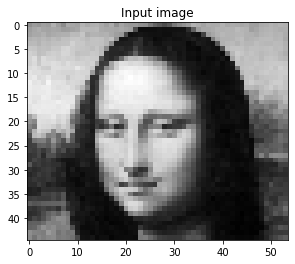

Energy of input image: 41451915


In [12]:
img = plt.imread('monalisa.gif')

import cv2 #To resize the image
img1 = cv2.resize(img, (54, 45))
print('Input image size:', img1.shape)

plt.title('Input image')
plt.imshow(img1, cmap='gray')
plt.show()
print('Energy of input image:', energy_mat(img1))

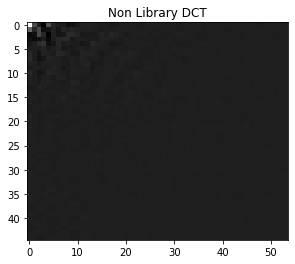

Processing time for Non Library DCT: 24.495777
Energy of DCT of image using my method: 41451914.999999896



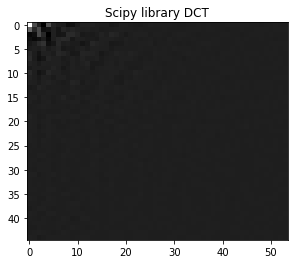

Processing time for Scipy method: 0.000133
Energy of DCT of image using Scipy: 41451914.999999925


In [16]:
tic1 = time.time()
dct1 = DCT_2d(img1)
toc1 = time.time()

plt.imshow(dct1, cmap = 'gray')
plt.title('Non Library DCT')
plt.show()
print('Processing time for Non Library DCT: {:f}'.format(toc1 - tic1))
print('Energy of DCT of image using my method:', energy_mat(dct1))
print()

tic2 = time.time()
dct2 = dct(dct(img1.T, norm='ortho').T, norm='ortho')
toc2 = time.time()

plt.imshow(dct2, cmap = 'gray')
plt.title('Scipy library DCT')
plt.show()
print('Processing time for Scipy method: {:f}'.format(toc2 - tic2))
print('Energy of DCT of image using Scipy:', energy_mat(dct2))


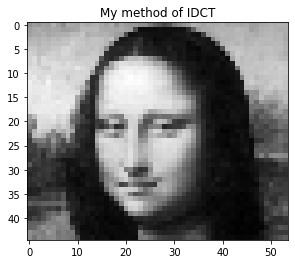

Processing time for Non Library method: 25.100450


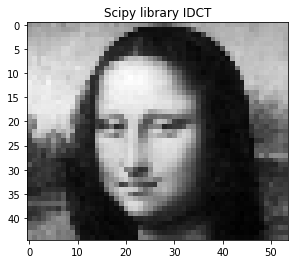

Processing time for Scipy IDCT method: 0.000235


In [17]:
tic3 = time.time()
idct1 = IDCT_2d(dct1)
toc3 = time.time()

plt.imshow(idct1, cmap = 'gray')
plt.title('My method of IDCT')
plt.show()
print('Processing time for Non Library method: {:f}'.format(toc3 - tic3))


tic4 = time.time()
idct2 = idct(idct(dct2.T, norm='ortho').T, norm='ortho')
toc4 = time.time()

plt.imshow(idct2, cmap = 'gray')
plt.title('Scipy library IDCT')
plt.show()
print('Processing time for Scipy IDCT method: {:f}'.format(toc4 - tic4))